In [20]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [3]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv("IMDB Dataset.csv")
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [5]:
def clean_review(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)                 # remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)            # keep only letters
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [6]:
df['clean_review'] = df['review'].apply(clean_review)

In [7]:
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['clean_review']).toarray()
y = df['sentiment'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

Accuracy: 0.8358
              precision    recall  f1-score   support

    negative       0.84      0.82      0.83      4961
    positive       0.83      0.85      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



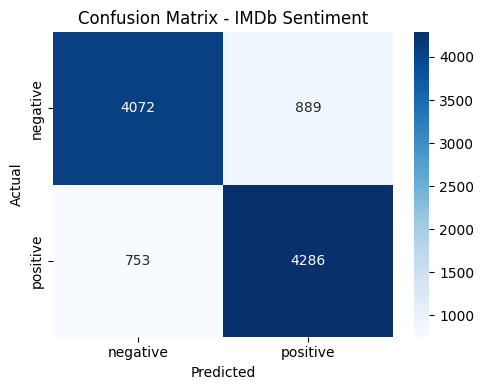

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - IMDb Sentiment')
plt.tight_layout()
plt.show()